In [5]:
import numpy as np 
from tqdm.notebook import tqdm 
import os
import pandas as pd

def init_blogs_as_dict(dataset_path: str) -> dict:
    # get the dataset as a dic, with key being author id and value being a list of contents
    raw_data = {}

    # transform user_id's as well
    label_transformer = {}
    label_count = 0

    # for every blog (i.e. every file in the directory
    for directory, subdirectories, files in os.walk(dataset_path):

        for file in tqdm(files):

            # get the author id
            auth_id = file.split('.')[0]
            if auth_id not in label_transformer.keys():
                label_transformer[auth_id] = label_count
                label_count += 1

            with open(os.path.join(directory, file), 'r', errors='ignore') as f:

                # we want just the data between the <post> and </post> tags as content
                lines = f.readlines()

                auth_content = []

                get_content = False

                this_line_content = ''

                for line in lines:
                    if get_content:

                        # if line is not empty
                        if not line.isspace():
                            this_line_content += line.strip()

                        if '</post>' in line:
                            get_content = False
                            auth_content.append(this_line_content)
                            this_line_content = ''

                    else:

                        # only get what is between these lines. XML parsing may be easier but this will work
                        if '<post>' in line:

                            get_content = True

                # we have all the lines, add the content to the author
                if label_transformer[auth_id] in raw_data.keys():
                    raw_data[label_transformer[auth_id]].extend(auth_content)
                else:
                    raw_data[label_transformer[auth_id]] = auth_content

        return raw_data


In [2]:
# get the raw data - gives a dict key'd on auth with values a list of passages
data = init_blogs_as_dict('/home/jtyo/Repos/AuthorshipAttribution/data/Blog/blogs')

In [3]:
# how many authors are there?
print(f'there are {len(data.keys())} authors')

there are 19320 authors


mean:  35.26335403726708
std:  105.33820573557426
median:  11.0
min:  1
max:  4221
total number of texts:  681288


<AxesSubplot:>

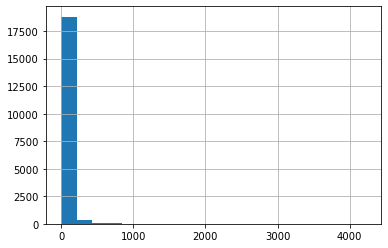

In [16]:
# what is the distribution of texts? 
# build a list of (auth, num texts)
text_counts = []
for auth in data.keys():
    text_counts.append([auth, len(data[auth])])
# plot a hisogram and statistics of this
df_text_counts = pd.DataFrame(text_counts, columns=['author','num_texts'])

print('mean: ', df_text_counts['num_texts'].mean())
print('std: ', df_text_counts['num_texts'].std())
print('median: ', df_text_counts['num_texts'].median())
print('min: ', df_text_counts['num_texts'].min())
print('max: ', df_text_counts['num_texts'].max())
print('total number of texts: ', df_text_counts['num_texts'].sum())


df_text_counts['num_texts'].hist(bins=20)

mean:  1125.98
std:  535.2118617610197
median:  1016.0
min:  629
max:  4221
total number of texts:  112598


<AxesSubplot:>

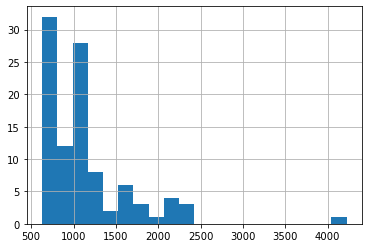

In [18]:
# if we keep only the authors with the top 100 number of texts, then:
def my_sorter(e):
    return e[1]

text_counts.sort(reverse=True, key=lambda x: x[1])

top100_text_counts = text_counts[:100]

df_top100_counts = pd.DataFrame(top100_text_counts, columns=['auth', 'num_texts'])

print('mean: ', df_top100_counts['num_texts'].mean())
print('std: ', df_top100_counts['num_texts'].std())
print('median: ', df_top100_counts['num_texts'].median())
print('min: ', df_top100_counts['num_texts'].min())
print('max: ', df_top100_counts['num_texts'].max())
print('total number of texts: ', df_top100_counts['num_texts'].sum())


df_top100_counts['num_texts'].hist(bins=20)